# Software Evolution - Practical Session
## Laws of software evolution based on code counting
## Academic year 2023-2024

### Write your answers under the questions that are present in this notebook  

#### Note: Print the final output of each cell in this notebook

#### Read the provided description document before proceeding with the following notebook

## 1.  Data preprocessing

To install packages, use :

pip install tqdm  pandas numpy matplotlib scikit-learn

In [297]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from permetrics.regression import RegressionMetric
from scipy.optimize import curve_fit

### Import dataset

First, import the dataset that contains the total lines of code, total blank lines, total comment lines, total number of files, and release date for each tag.

In [298]:
# WRITE YOUR CODE HERE
df_Growth=pd.read_csv('data/LawIncreasingGrowthDataset.csv')

### Dataset A : Major.Minor.Patch tag format

Filter out non-official releases such as alpha, beta, release candidates, milestones, branches, and unnumbered tags. Additionally, version numbers typically follow a Major.Minor.Patch format, but exceptions exist (e.g., 1.4, 3.3.0.1, 4.3.0.1, or 4.3.1.1). Versions with more than three components are disregarded, and two-component versions are treated as implicit three-component versions (e.g., 1.4 is interpreted as 1.4.0).  

Write a regular expression statement to identify tags following semantic versioning (major.minor.patch) guidelines. You can use the pattern: '^v?[0-9]+\.[0-9]+(\.[0-9]+)?$'  

Once you've applied this regex, print out the selected major.minor.patch dataset.

In [299]:
# WRITE YOUR CODE HERE
df_Growth1=df_Growth[ df_Growth['tag'].str.contains(r'^v?[0-9]+\.[0-9]+(\.[0-9]+)?$')]     
df_Growth1=df_Growth1.reset_index()
df_Growth1 = df_Growth1.drop('index', axis=1)
df_Growth1

/tmp/ipykernel_4566/3734359992.py:2: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df_Growth1=df_Growth[ df_Growth['tag'].str.contains(r'^v?[0-9]+\.[0-9]+(\.[0-9]+)?$')]


,tag,code,blank,comment,nFiles,release_date
0,1.4,48551,8727,11154,419,2009-01-06
1,1.5.0,63240,11018,18457,512,2009-02-18
2,1.5.1,67939,11618,18131,600,2009-08-05
3,1.5.2,68564,11555,11906,611,2009-08-17
4,1.6.1,86799,14582,41327,744,2009-11-05
5,2.0.0,115586,18488,42717,1074,2010-06-05
6,2.0.1,115699,18492,42724,1074,2010-07-06
7,3.0.0,188246,29836,60879,1694,2012-02-07
8,3.0.1,189022,29945,61587,1696,2012-03-12
9,3.1.0,191269,29973,62628,1642,2012-06-22


### Dataset B : Major.Minor tag format

Starting from the previous data (**Dataset A**),  for each Major.Minor.Patch tag group, select the earliest version (e.g., for a set of 4.4.0, 4.4.1, and 4.4.2, consider 4.4.0 and rename it to 4.4).

In [300]:
# WRITE YOUR CODE HEREdf_Growth

version_pattern2 = r'^v?(\d+\.\d+)(?:\.\d+)?$'
df_Growth2=df_Growth[df_Growth['tag'].str.contains(r'^v?[0-9]+\.[0-9]+(\.[0-9]+)?$')]     
df_Growth2['Major_Minor'] = df_Growth2['tag'].str.extract(version_pattern2)
df_Growth2['Major_Minor'] = df_Growth2['Major_Minor'].astype(str)
earliest_versions = df_Growth2.groupby('Major_Minor')['tag'].min()

first_occurrences = {}
for major_minor, earliest_version in earliest_versions.items():
    major_minor_df = df_Growth2[df_Growth2['Major_Minor'] == major_minor]
    first_occurrence = major_minor_df[major_minor_df['tag'] == earliest_version].iloc[0]
    first_occurrences[major_minor] = first_occurrence

df = pd.DataFrame(list(first_occurrences.values()))

df.drop(columns=['Major_Minor'], inplace=True)
df["tag"]=df["tag"].str.split('.', n=2).str[:2].str.join('.')
df=df.reset_index()
df = df.drop('index', axis=1)
df_Growth2=df
print(df_Growth2)

    tag    code  blank  comment  nFiles release_date
0   1.4   48551   8727    11154     419   2009-01-06
1   1.5   63240  11018    18457     512   2009-02-18
2   1.6   86799  14582    41327     744   2009-11-05
3   2.0  115586  18488    42717    1074   2010-06-05
4   3.0  188246  29836    60879    1694   2012-02-07
5   3.1  191269  29973    62628    1642   2012-06-22
6   3.2  257934  43596   119688    2004   2012-12-17
7   3.3  350914  58798   159566    2682   2013-06-20
8   3.4  291555  48371   149981    2367   2013-10-24
9   4.0  357375  57707   159944    2790   2014-05-30
10  4.1  419663  68854   208270    3283   2015-01-28
11  4.2  438240  71324   218459    3439   2015-10-22
12  4.3  455646  72172   219435    3405   2016-08-09
13  4.4  472926  75325   216544    3597   2017-03-07


/tmp/ipykernel_4566/3058650102.py:4: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df_Growth2=df_Growth[df_Growth['tag'].str.contains(r'^v?[0-9]+\.[0-9]+(\.[0-9]+)?$')]
/tmp/ipykernel_4566/3058650102.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Growth2['Major_Minor'] = df_Growth2['tag'].str.extract(version_pattern2)
/tmp/ipykernel_4566/3058650102.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Growth2['

## 2. Law of Increasing Growth

### Software project's metrics

Visualize four plots representing the evolution of a software project's metrics, including the number of lines of code, blank lines, comment lines, and the number of files, as follows:  

1. Plot the metrics against software version numbers:  
   1.1) For version tags of the format major.minor.patch.  
   1.2) For version tags of the format major.minor.  
   Place these plots at positions (0,0) and (0,1) respectively.  
  
2. Plot the metrics against dates:  
   2.1) For version tags of the format major.minor.patch.  
   2.2) For version tags of the format major.minor.  
   Place these plots right below the corresponding version-based plots, at positions (1,0) and (1,1).  

Hint: Ensure proper datetime formatting for the dates in the datasets instead of storing them as strings.

For example, if you're working with a DataFrame:

fig, axes = plt.subplots(2, 2, figsize=(18, 10))  
dataset_a[['code', 'blank', 'comment', 'nFiles', 'tag']].plot(x='tag', ax=axes[0, 0], legend=True)  
.....  

axes[0, 0].set_xlabel('Major.Minor.Patch versions')  
.....  

plt.tight_layout()  
plt.show()

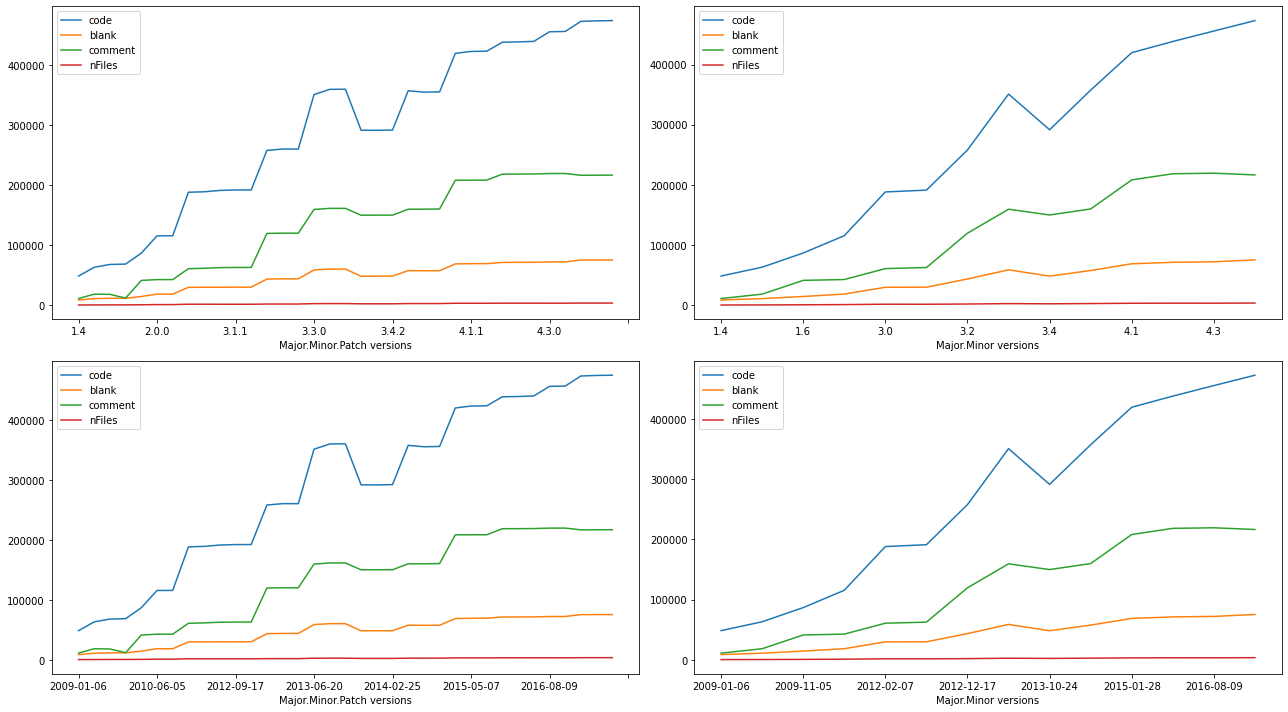

In [301]:
# WRITE YOUR CODE HERE
fig, axes = plt.subplots(2, 2, figsize=(18, 10))  
df_Growth1[['code', 'blank', 'comment', 'nFiles', 'tag']].plot(x='tag', ax=axes[0, 0], legend=True)  
df_Growth2[['code', 'blank', 'comment', 'nFiles', 'tag']].plot(x='tag', ax=axes[0, 1], legend=True)  


axes[0, 0].set_xlabel('Major.Minor.Patch versions')  
axes[0, 1].set_xlabel('Major.Minor versions')  

df_Growth1[['code', 'blank', 'comment', 'nFiles', 'release_date']].plot(x='release_date', ax=axes[1, 0], legend=True)  
df_Growth2[['code', 'blank', 'comment', 'nFiles', 'release_date']].plot(x='release_date', ax=axes[1, 1], legend=True)  


axes[1, 0].set_xlabel('Major.Minor.Patch versions')  
axes[1, 1].set_xlabel('Major.Minor versions')  

plt.tight_layout()  
plt.show()

### Questions:

1. Do you find any difference between the plot that is having date in the x-axis and the plot that is having tag in the x-axis? If yes, then what is the difference? If no, then why is it same?

No because the  earliest version represents the earliest time.(eg. 1.4 has made before the 1.6)

2. Which type of plot is preferable for software evolution analysis?   
    a) date in x-axis  
    b) tag in x-axis  
Why?

tag in x-axis because it makes the plot easier to read."

### Correlation 

Correlation is generally used to analyse the relationship between variables. Here, analyse the relationship between the number of lines of code and the number of files using Spearman correlation and Pearson correlation by considering **Dataset A**. Report the correlation upto 3 decimal places.

In [302]:
# WRITE YOUR CODE HERE

from scipy.stats import spearmanr, pearsonr

correlation_spearman, p_value = spearmanr(df_Growth1["code"],df_Growth1["nFiles"])
correlation_pearson, p_value_pearson = pearsonr(df_Growth1["code"],df_Growth1["nFiles"])

print(f"Spearman Corrélation : {format(correlation_spearman,'.3f')}",)
print(f"Person Corrélation : {format(correlation_pearson,'.3f')}")



Spearman Corrélation : 0.986
Person Corrélation : 0.998


### Questions:

3. Do you find any difference in correlation values between Pearson and Spearman? Which correlation measure is preferable for this use case? why?

There is not big different between the 2 corelation.
However, Spearman correlation is preferable because we wan juste know if the the number of lines of code and the number of files increase similarly.

4. Based on the above correlation value, please give your opinion on the relation between the number of lines and the number of files? Which of both size metrics do you propose to use in the remainder of your analysis?

The number of lines and the number of files exhibit a linear correlation. We use the Pearson correlation because this correlation is stronger than the Spearman correlation.

### Regression analysis

Visualize a linear regression analysis of the relationship between the release date and the total number of files by considering **Dataset B**.  

Hint:

1. Prepare the data: Convert the release date to integers and set number of files as the target variable.  
2. Apply linear regression analysis to understand the relationship between the release date and the total number of files.  
3. Calculate Mean Relative Error and ajusted R-squared metrics.    
4. Generate a scatter plot showing the release dates against the total number of files. Then, overlay the linear regression line on the plot.


In [303]:
# WRITE YOUR CODE HERE

#1. Prepare this data
df_Growth2['release_date_int']=pd.to_datetime(df_Growth2['release_date']).astype(np.int64)//10**9
x = df_Growth2[['release_date_int']]
y = df_Growth2['nFiles']

In [304]:
#2. Apply linear regression
from sklearn.model_selection import train_test_split
model = LinearRegression()
model.fit(x, y)

#3. Calculate Mean Relative Error and ajusted R-squared metrics.    
# Make predictions
predictions = model.predict(x)

from sklearn.metrics import mean_absolute_error, r2_score

# Calculer le MAE
mae = mean_absolute_error(y, predictions)

# Calculer le R²
r_squared = r2_score(y, predictions)

# Nombre d'échantillons
n_samples = len(y)

# Nombre de caractéristiques
n_features = x.shape[1]

# Calculer le R² ajusté
adjusted_r_squared = 1 - (1 - r_squared) * ((n_samples - 1) / (n_samples - n_features - 1))

print("MAE:", mae)
print("Adjusted R^2:", adjusted_r_squared)

MAE: 142.29410623025265
Adjusted R^2: 0.9698878845416345


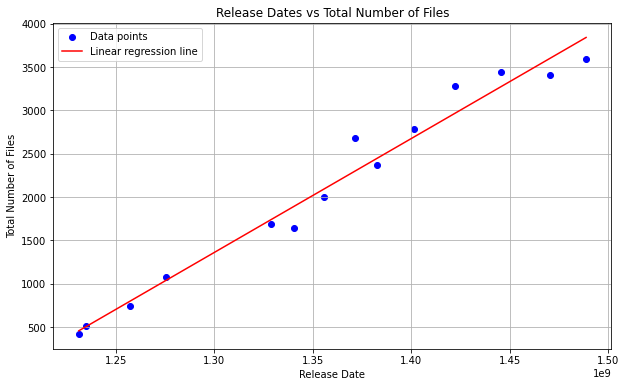

In [305]:
plt.figure(figsize=(10, 6))

# Nuage de points : Dates de publication par rapport au nombre total de fichiers
plt.scatter(x,y, color='blue', label='Data points')

# Ligne de régression linéaire
plt.plot(x, predictions, color='red', label='Linear regression line')

# Ajouter des étiquettes et un titre
plt.xlabel('Release Date')
plt.ylabel('Total Number of Files')
plt.title('Release Dates vs Total Number of Files')

# Afficher la légende
plt.legend()

# Afficher la grille
plt.grid(True)

# Afficher le graphique
plt.show()

### Questions:

5. Choose an option regarding the growth of the software. Motivate your choice using the 2D regression plot.  
    a) Linear  
    b) Sub-linear  
    c) Super-linear  

Linear because the linear regression line remains constant between the two axes.

6. Report the MRE and ajusted R-squared values.

MAE: 142.29410623025265


Adjusted R^2: 0.9698878845416345

### Fitting & forecasting

Using **Dataset A**, apply parametric regression models (e.g., linear, exponential, power, quadratic, logarithmic) to predict the number of files in software releases based on historical data.

**Steps:**

1. Prepare Data:
   - Convert "release_date" to datetime format.
   - Calculate "release_days" as the number of days since the earliest release.

2. Split Data:
   - Separate data into features (release days) and target variable (number of files).
   - Split data into training and testing sets from the earliest release up to a specific point.

3. Build and Train Models:
   - Define regression models.
   - Fit models to training data (maybe using `curve_fit` from SciPy).

4. Forecast Future Data:
   - Predict the number of files for future release days using trained models.

5. Visualize Results:
   - Plot original data and forecasted values for each regression model.

6. Evaluate Models:
   - Calculate adjusted R-squared and mean relative error for each model using training and test data.

In [310]:
# WRITE YOUR CODE HERE
df_Growth2['release_date']=pd.to_datetime(df_Growth2['release_date'])
earliest_release = df_Growth2['release_date'].min()
# Calculer "release_days" comme le nombre de jours depuis la première sortie
df_Growth2['release_day'] = (df_Growth2['release_date'] - earliest_release).dt.days


In [311]:
# WRITE YOUR CODE HERE
X=df_Growth2[['release_day']]
Y=df_Growth2['nFiles']

from sklearn.model_selection import train_test_split

x_train, x_test,y_train, y_test=train_test_split(X,Y,test_size=0.2,shuffle=False)

In [312]:
# WRITE YOUR CODE HERE
# Définir une fonction pour la régression linéaire
def linear_regression(x, m, c):
    return m * x + c

# Ajuster le modèle aux données d'entraînement
params, _ = curve_fit(linear_regression, x_train.values.flatten(), y_train.values)

model=LinearRegression()
prediction=model.fit(x_train,y_train)

In [332]:

# Step 4: Forecast Future Data
# Let's say you want to forecast for the next 30 days
last_observed_day = X_train.max().iloc[0]
future_days = np.arange(last_observed_day + 1, last_observed_day + 31).reshape(-1, 1)

# Predict the number of files for future release days using the trained model
future_predictions = model.predict(future_days)

print("Future Predictions:")
for day, prediction in zip(future_days, future_predictions):
    print("Day {}: {:.2f}".format(day, prediction))


Future Predictions:
Day [1488844801]: 1827616851.06
Day [1488844802]: 1827616852.29
Day [1488844803]: 1827616853.51
Day [1488844804]: 1827616854.74
Day [1488844805]: 1827616855.97
Day [1488844806]: 1827616857.20
Day [1488844807]: 1827616858.42
Day [1488844808]: 1827616859.65
Day [1488844809]: 1827616860.88
Day [1488844810]: 1827616862.11
Day [1488844811]: 1827616863.33
Day [1488844812]: 1827616864.56
Day [1488844813]: 1827616865.79
Day [1488844814]: 1827616867.02
Day [1488844815]: 1827616868.24
Day [1488844816]: 1827616869.47
Day [1488844817]: 1827616870.70
Day [1488844818]: 1827616871.93
Day [1488844819]: 1827616873.15
Day [1488844820]: 1827616874.38
Day [1488844821]: 1827616875.61
Day [1488844822]: 1827616876.84
Day [1488844823]: 1827616878.06
Day [1488844824]: 1827616879.29
Day [1488844825]: 1827616880.52
Day [1488844826]: 1827616881.75
Day [1488844827]: 1827616882.97
Day [1488844828]: 1827616884.20
Day [1488844829]: 1827616885.43
Day [1488844830]: 1827616886.66


/home/administrateur/.local/lib/python3.10/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


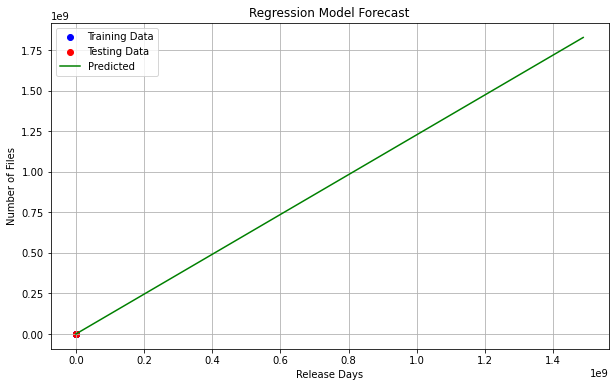

In [334]:
# WRITE YOUR CODE HERE

# Step 5: Visualize Results
# Plot original data
plt.figure(figsize=(10, 6))
plt.scatter(x_train, y_train, color='blue', label='Training Data')
plt.scatter(x_test, y_test, color='red', label='Testing Data')

# Plot forecasted values
plt.plot(np.concatenate((x_train, x_test, future_days)), 
         np.concatenate((model.predict(x_train), model.predict(x_test), future_predictions)),
         color='green', linestyle='-', label='Predicted')

plt.xlabel('Release Days')
plt.ylabel('Number of Files')
plt.title('Regression Model Forecast')
plt.legend()
plt.grid(True)
plt.show()


In [337]:
# WRITE YOUR CODE HERE
# Step 6: Evaluate Models
# Calculate adjusted R-squared for the training and test data
r_squared_train = r2_score(y_train, model.predict(x_train))
r_squared_test = r2_score(y_test, model.predict(x_test))
print("Adjusted R-squared (Training):", r_squared_train)
print("Adjusted R-squared (Testing):", r_squared_test)

# Calculate mean absolute error for the training and test data
mae_train = mean_absolute_error(y_train, model.predict(x_train))
mae_test = mean_absolute_error(y_test, model.predict(x_test))
print("Mean Absolute Error (Training):", mae_train)
print("Mean Absolute Error (Testing):", mae_test)

Adjusted R-squared (Training): 0.9710583499126545
Adjusted R-squared (Testing): -15.106327051456212
Mean Absolute Error (Training): 123.10430198098597
Mean Absolute Error (Testing): 278.35081037205055


### Questions:

7. Which regression model do you prefer for assessing the goodness of fit, based on the evaluation metrics scores? Why?

8. Which regression model do you prefer for assessing forecast accuracy, based on the evaluation metrics scores? Why?

### Modify the CLOC parameters

Exclude all bank lines and verify if the Law of Increasing Growth applies after this filtering

In [ ]:
# WRITE YOUR CODE HERE

Exclude all comment lines and verify if the Law of Increasing Growth applies after this filtering

In [ ]:
# WRITE YOUR CODE HERE

## 3. Law of Continuing Change

### Dataset A : Major.Minor.Patch tag format

Import Dataset A that contains number of lines of code that are added, modified, removed and same between two consecutive tags for the three component versions (major.minor.patch)

In [ ]:
# WRITE YOUR CODE HERE

df_A=pd.read_csv('data/LawContinuingChangeDatasetA.csv')


Create a plot displaying all features together. Show the outcomes with dates on the x-axis and the corresponding numbers on the y-axis.

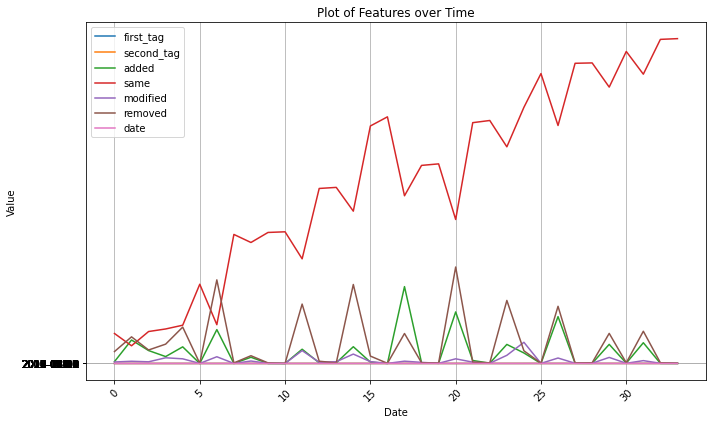

In [352]:
# WRITE YOUR CODE HERE
plt.figure(figsize=(10, 6))

for column in df_A.columns:
    plt.plot(df_A.index, df_A[column], label=f"{column}")

plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Plot of Features over Time')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

### Dataset B : Major.Minor tag format

Import Dataset B that contains number of lines of code that are added, modified, removed and same between two consecutive tags for the minor versions (major.minor)

In [348]:
# WRITE YOUR CODE HERE
df_B=pd.read_csv('data/LawContinuingChangeDatasetB.csv')

Produce a plot where all features are represented together. Present the outcomes with dates on the x-axis and the corresponding numbers on the y-axis.

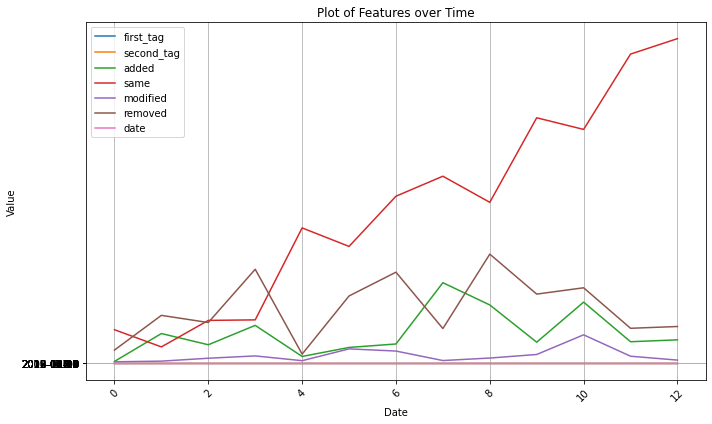

In [351]:
# WRITE YOUR CODE HERE

# WRITE YOUR CODE HERE
plt.figure(figsize=(10, 6))

for column in df_B.columns:
    plt.plot(df_B.index, df_B[column], label=f"{column}")

plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Plot of Features over Time')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

### Question:

1. Do you find empirical support for the Law of Continuing Change ? Motivate your response.